In [2]:
""" Prova """

import xarray as xr
import netCDF4 as nc
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

import math
import matplotlib
from matplotlib import ticker
import os,sys
import matplotlib.pylab as plt

from pylab import polyfit

from IPython.display import Markdown # for color printing 

# define a function for pretty plotting 
def cprint(text, color):
    """ Nicely color-prints the text given with the color chosen """
    # see reference: https://htmlcolorcodes.com/
    dic ={ 'red'     : '#ff0000' , 'blue' : '#0000FF' , 'green':'#00FF00' ,
           'aqua'    : '#00FFFF' ,
           'fuchsia' : '#FF00FF' } # mapping nasmes to HTML color codes
    
    display (Markdown('<span style="color:' + dic[color] + '"> ' + text + '</span>'))


# variables of interest 
varis = ['lat', 'lon', 'plev', 'sonde_type', 'wind_speed', 'wind_speed_bias', 'wind_speed_dep',
       'wind_speed_glob', 'wind_speed_num_obs', 'wind_speed_num_obs_bias', 'wind_speed_num_obs_dep',
       'wind_speed_num_obs_glob', 'wind_speed_std_dev', 'wind_speed_std_dev_bias', 'wind_speed_std_dev_dep',
       'wind_speed_std_dev_glob', 'time', 'year', 'month', 'hour']


to_drop = ['sonde_type']

out_dir = 'Plots'
os.system('mkdir ' + out_dir )
out_dir = 'Plots/Monthly_Averages'
os.system('mkdir ' + out_dir )


month_dic = { 1 : 'January' , 2  : 'February'  , 3  : 'March'     , 4 : 'April' , 5: 'May' , 6:'June' ,
                  7 : 'July'    , 8  : 'August'    , 9  : 'September' , 
                 10 : 'October' , 11 : 'November'  , 12 : 'December'  }
    
std_plevels = [1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 70000, 85000, 92500, 100000]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
""" Load the averaged file """
dir = '/raid60/scratch/federico/MONTHLY_FEB2021/wind_speed/'
f1 = '0-20000-0-10393_monthly_averages_wind_speed.nc'
station = '10393'

#f2 = '82930_monthly_averages_VARIABLE.nc'
#station = '82930'

average   = xr.open_dataset(dir + f1 , engine = 'h5netcdf' , decode_times = True , drop_variables= to_drop).to_dataframe()
average['year']  = pd.arrays.DatetimeArray (average['time'].values[:] ).year
average['month'] = pd.arrays.DatetimeArray (average['time'].values[:] ).month
average['hour']  = pd.arrays.DatetimeArray (average['time'].values[:] ).hour

variable = 'wind_speed'
#print(average[500:550])

In [4]:
def plot_series(average_df = '' , min_year = 1970, max_year = 2000 , pressure = '' , variable = '', months = ['1'] , station = '' , text = '', plot_errors = False):
    
    """ Plot the time series of the averages comprised between min_year and max_year. 
        average_df: dataframe of the observations_table """

    #print(average_df.columns) 
    
    months = range(1,13) 
    
    years = range(min_year, max_year)
    
    fs   = 15 # fotnsize for plotting
    
    obs_00 , obs_12, dt_12, dt_00 = [], [] , [] , []
    obs_00_global , obs_12_global = [] , []
    obs_00_reanalysis, obs_12_reanalysis = [] , []
    obs_00_unbiased, obs_12_unbiased = [] , []

    p = pressure
    for y in years:
                #print(y)
        for m in months:
                    #print(m)
            if m < 10:
                M = '0' + str(m) # correcting the month by adding a 0 
            else:
                M= str(m)
                        
            ts = str(y) + '-' + M + '-01'
            TS = np.datetime64(ts)
                    
            red    = average_df.loc [ ( average_df['year'] == y ) &    
                                          ( average_df['month'] == m ) & 
                                          ( average_df['plev'] == p ) ]
                    
            red_12 = red.loc [ ( red['hour'] == 12 ) ]  
            red_00 = red.loc [ ( red['hour'] == 0 ) ]  

            try:
                        obs_12.append(red_12[variable][0])
                        dt_12.append(TS)
                        
                        obs_12_global    .append(red_12[variable + '_glob'][0] )
                        obs_12_reanalysis.append(red_12[variable + '_dep'][0] )
                        obs_12_unbiased.append(red_12[variable + '_bias'][0] )


            except:
                        pass
 
            try:
                        obs_00.append(red_00[variable][0])
                        dt_00.append(TS)
                    
                        obs_00_global    .append(red_00[variable + '_glob'][0] )
                        obs_00_reanalysis.append(red_00[variale + '_dep'][0] )
                        obs_00_unbiased.append(red_00[variable + '_bias'][0] )
                        
            except:
                        pass
                    

    def plot(dt_hh, value_hh , value_hh_global, value_hh_reanalysis , value_hh_unbiased, hour = 12):

        fig, ax = plt.subplots(figsize=(8,7) )
        # incorrect averages 
        #plt.plot    (dt_12, value_00 , label = 'h:00 ' , color = 'lime')
        #plt.scatter (dt_00, value_00 , color = 'limegreen')

        plt.plot    (dt_hh, value_hh            , label = 'Monthly Average '    , color = 'blue' )
        plt.scatter (dt_hh, value_hh_global     , label = 'Global Average '     , color = 'red'  , s = 50 )
        #print(dt_hh, value_hh_reanalysis)
        plt.scatter (dt_hh, value_hh_reanalysis , label = 'Reanalysis Average ' , color = 'black', s = 30 )
        plt.scatter (dt_hh, value_hh_unbiased   , label = 'Unbiased Average '   , color = 'gold' , s = 20 )
        plt.grid(ls =":" , color = "lightgray")   

        """ General Properties """
        
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='x'   , which='major', labelsize=15 , rotation = 45)

        
        ax.tick_params(axis='both', which='minor', labelsize=8)
        #w = ax.invert_yaxis() 
        
        ax.set_ylabel( 'Time Stamp'      , fontsize = fs )     
        ax.set_ylabel( 'Wind Speed [m/s]' , fontsize = fs )
        ax.set_ylim(min(value_hh_global)-20, max(value_hh_global)+20)
        ax.legend(loc = 'lower right', fontsize = fs-5 , ncol = 2) 
                
        plt.title("Average Wind Speed h:" + hour + " - Plev=" + str(p) + ' [m/s] - Station ' + station , fontsize = fs , y = 1.02 )
        plt.savefig(out_dir + '/' + station + '_' + str(p) + '_' + str(hour) + '_wind_speed_averages.png' ,   bbox_inches = 'tight' , dpi = 200 )

        plt.show()    
        plt.close()        
        

        
    ff = plot(dt_12, obs_12, obs_12_global, obs_12_reanalysis, obs_12_unbiased, hour = '12' )
    ff = plot(dt_00, obs_00, obs_00_global, obs_00_reanalysis, obs_00_unbiased, hour = '00' )

    # dates = date range 
    

[numpy.datetime64('2010-01-01'), numpy.datetime64('2010-02-01'), numpy.datetime64('2010-03-01'), numpy.datetime64('2010-04-01'), numpy.datetime64('2010-05-01'), numpy.datetime64('2010-06-01'), numpy.datetime64('2010-07-01'), numpy.datetime64('2010-08-01'), numpy.datetime64('2010-09-01'), numpy.datetime64('2010-10-01'), numpy.datetime64('2010-11-01'), numpy.datetime64('2010-12-01'), numpy.datetime64('2011-01-01'), numpy.datetime64('2011-02-01'), numpy.datetime64('2011-03-01'), numpy.datetime64('2011-04-01'), numpy.datetime64('2011-05-01'), numpy.datetime64('2011-06-01'), numpy.datetime64('2011-07-01'), numpy.datetime64('2011-08-01'), numpy.datetime64('2011-09-01'), numpy.datetime64('2011-10-01'), numpy.datetime64('2011-11-01'), numpy.datetime64('2011-12-01'), numpy.datetime64('2012-01-01'), numpy.datetime64('2012-02-01'), numpy.datetime64('2012-03-01'), numpy.datetime64('2012-04-01'), numpy.datetime64('2012-05-01'), numpy.datetime64('2012-06-01'), numpy.datetime64('2012-07-01'), numpy.d

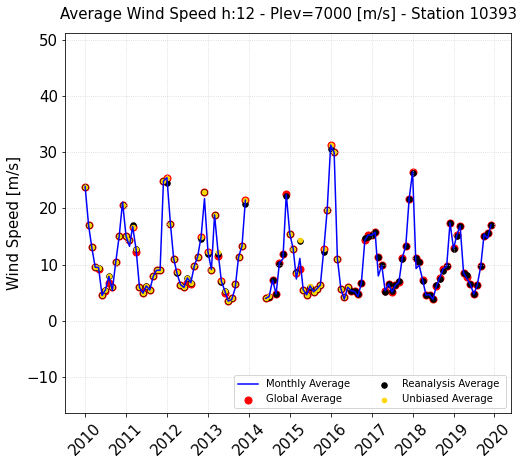

[numpy.datetime64('2010-01-01'), numpy.datetime64('2010-02-01'), numpy.datetime64('2010-03-01'), numpy.datetime64('2010-04-01'), numpy.datetime64('2010-05-01'), numpy.datetime64('2010-06-01'), numpy.datetime64('2010-07-01'), numpy.datetime64('2010-08-01'), numpy.datetime64('2010-09-01'), numpy.datetime64('2010-10-01'), numpy.datetime64('2010-11-01'), numpy.datetime64('2010-12-01'), numpy.datetime64('2011-01-01'), numpy.datetime64('2011-02-01'), numpy.datetime64('2011-03-01'), numpy.datetime64('2011-04-01'), numpy.datetime64('2011-05-01'), numpy.datetime64('2011-06-01'), numpy.datetime64('2011-07-01'), numpy.datetime64('2011-08-01'), numpy.datetime64('2011-09-01'), numpy.datetime64('2011-10-01'), numpy.datetime64('2011-11-01'), numpy.datetime64('2011-12-01'), numpy.datetime64('2012-01-01'), numpy.datetime64('2012-02-01'), numpy.datetime64('2012-03-01'), numpy.datetime64('2012-04-01'), numpy.datetime64('2012-05-01'), numpy.datetime64('2012-06-01'), numpy.datetime64('2012-07-01'), numpy.d

ValueError: x and y must be the same size

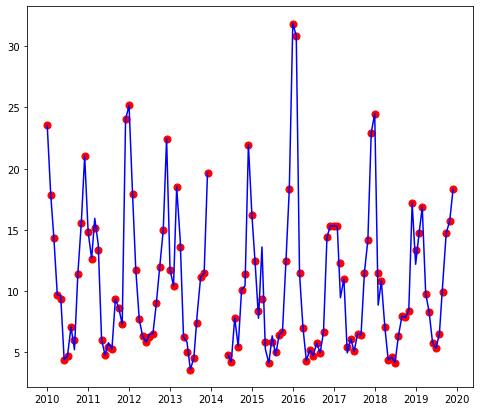

In [11]:
for p in [7000, 85000, 20000, 100000 ]:
    pp = plot_series(average_df = average, min_year = 2010, max_year = 2020 , pressure = p , station = station, plot_errors = False , variable = variable )

In [34]:
"""
Index(['date_time', 'observation_value', 'observation_value_global',
       'observation_value_reanalysis', 'observed_variable',
       'original_precision', 'original_precision_global',
       'original_precision_reanalysis', 'secondary_value',
       'secondary_value_global', 'secondary_value_reanalysis', 'sensor_id',
       'value_significance', 'z_coordinate', 'z_coordinate_type'],
      dtype='object')"""

"\nIndex(['date_time', 'observation_value', 'observation_value_global',\n       'observation_value_reanalysis', 'observed_variable',\n       'original_precision', 'original_precision_global',\n       'original_precision_reanalysis', 'secondary_value',\n       'secondary_value_global', 'secondary_value_reanalysis', 'sensor_id',\n       'value_significance', 'z_coordinate', 'z_coordinate_type'],\n      dtype='object')"

## MEANING OF THE VARIABLE
### **Monthly Average** = outliers were taken out considering only each month data
### **Global Average** = outliers were taken out considering all available data, per each month 
### **Reanalysis Average** = outliers were taken out considering reanalysis data (if reana was outlier, data point was removed) 
---

In [57]:
out_dir = 'Plots/Monthly_Averages/Profiles'
os.system('mkdir ' + out_dir )

def profile_per_month_and_year(average_df = average , min_year = 1970, max_year = 1990, station = station , text = '' ):
    """ This function plots the profile of the sonde for each available month and year in the date years range specified, for the available stadard p levels"""
    
    months = range(1,12+1) 
    years = range(min_year, max_year+1)
    
    fs = 15
    obs_00 , obs_12, dt_12, dt_00 = [], [] , [] , []
    
    '''
    month_dic = { 1 : 'January' , 2  : 'February'  , 3  : 'March'     , 4 : 'April' , 5: 'May' , 6:'June' ,
                  7 : 'July'    , 8  : 'August'    , 9  : 'September' , 
                 10 : 'October' , 11 : 'November'  , 12 : 'December'  }
    '''
    
    """ Fill the res dictionary with the temp-pressure profiles for each month and year """
    res = {}
    for y in years:
        res[y] = {}
        for m in months:
            res[y][m] = {}
            for h in [0,12]:
                res[y][m][h] = {}
                res[y][m][h]['plev'] = []
                res[y][m][h]['values']   = []

                for p in std_plevels:

                        red    = average_df.loc [ ( average_df['year'] == y ) &    
                                                  ( average_df['month'] == m ) & 
                                                  ( average_df['hour'] == h ) & 
                                                  ( average_df['plev'] == p ) ]
                                            
                        try:
                            value = red['ta_bias'][0]
                            res[y][m][h]['plev'].append(p)
                            res[y][m][h]['values']  .append(value)


                        except:
                            pass
 

    for m in months:
        
        found = False
        for h in [0,12]:
            fig, ax = plt.subplots(figsize=(8,7) )
            for y in years:
                #for h in [0,12]:
                    value = res[y][m][h]['values']

                    
                    press = res[y][m][h]['plev']
                
                    if len( [ v for v in value if not np.isnan(v) ] ) >1:
                        Values, Press = [],[]
                        for v,p in zip(value, press):
                            if not np.isnan(v):
                                Values.append(v)
                                Press.append(p/100)
                        
                        
                        found = True
                        plt.plot    (Values, Press , label = str(y) )
                        plt.scatter (Values, Press  )


                    else:
                        continue
            if found:
                """ Plot properties """
                #fig, ax = plt.subplots(figsize=(8,7) )

                ax.tick_params(axis='both', which='major', labelsize=15)
                ax.tick_params(axis='both', which='minor', labelsize=8)
                w = ax.invert_yaxis() 
                ax.set_ylabel( 'Pressure [hPa]'  , fontsize = fs )     
                ax.set_xlabel( 'Wind Speed [m/s]' , fontsize = fs )        
                plt.grid(ls =":" , color = "lightgray")   
                ax.legend(loc = 'upper right', fontsize = fs-2 , ncol = 2) 
            
                plt.title("Average Wind Speed h:" + str(h).replace('0','00') + " - " + month_dic[m] , fontsize = fs , y = 1.02 )
            
                plt.savefig(out_dir + '/' + station + '_wind_speed_profile_averages_month_' + str(m) + '_' + text + '.png' ,   bbox_inches = 'tight' , dpi = 200 )
                plt.show()    

                plt.close()    
                
        

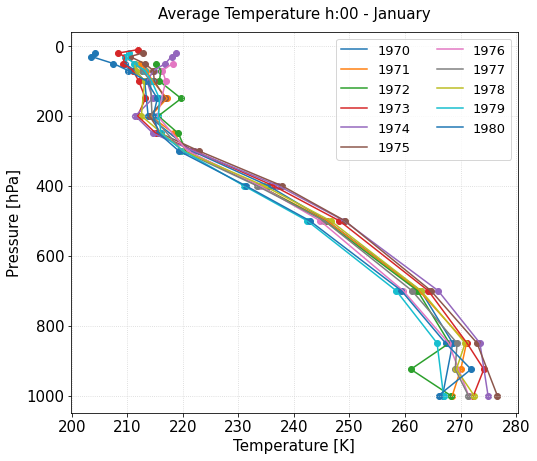

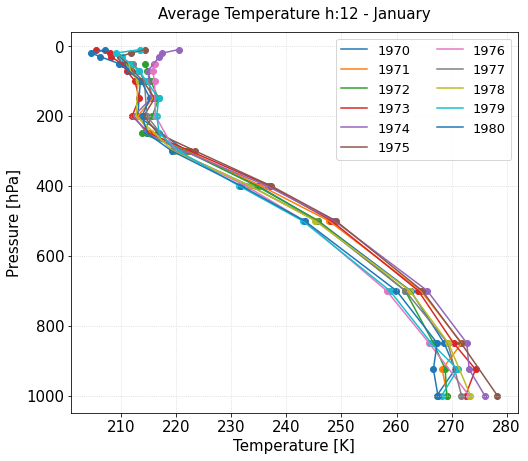

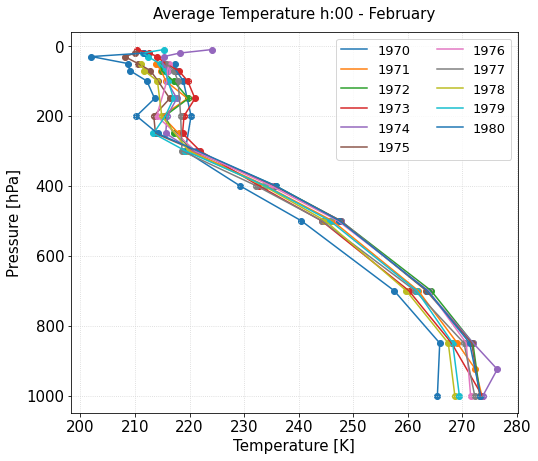

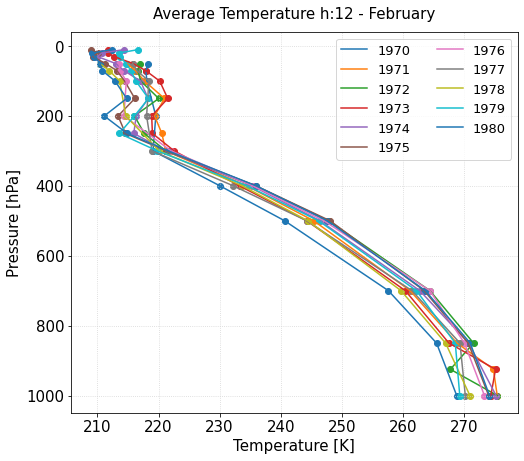

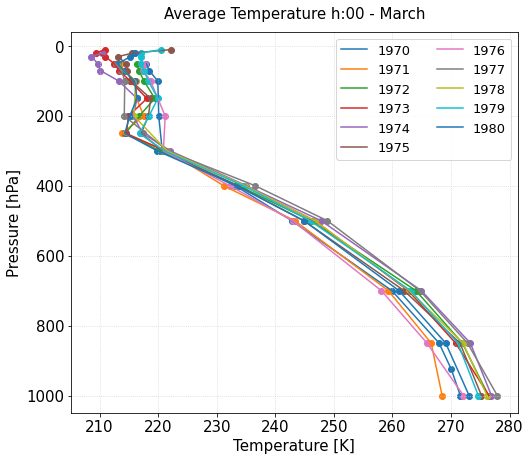

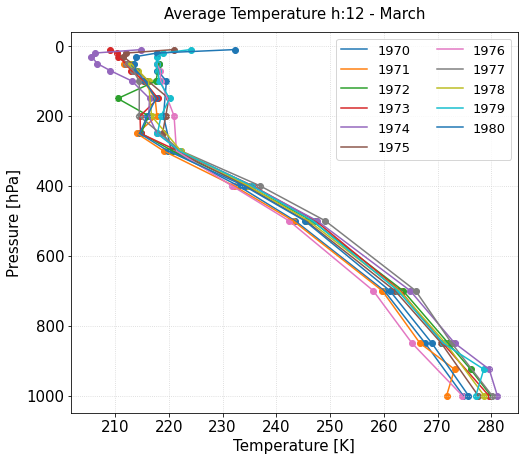

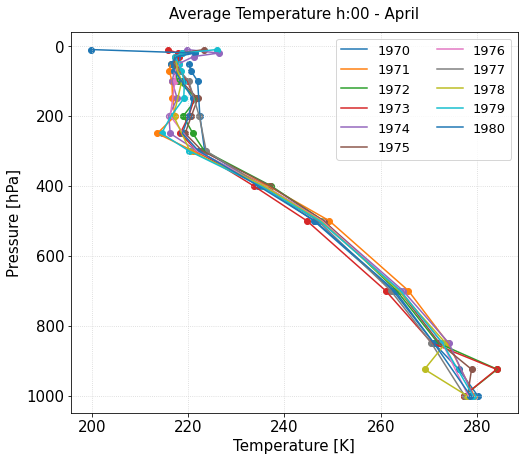

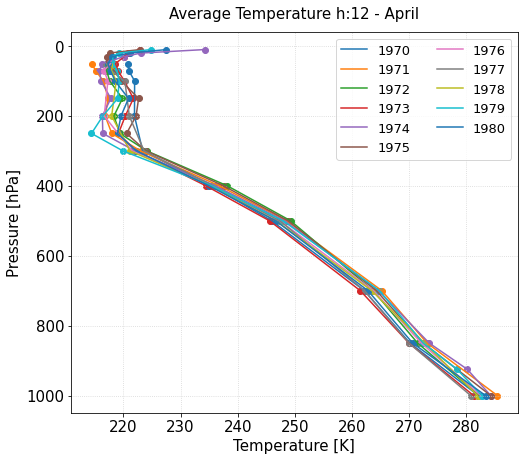

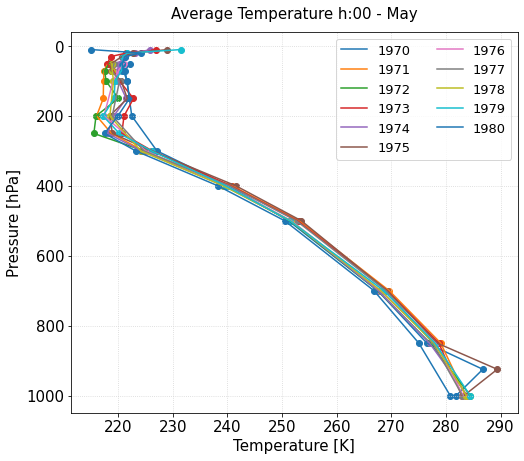

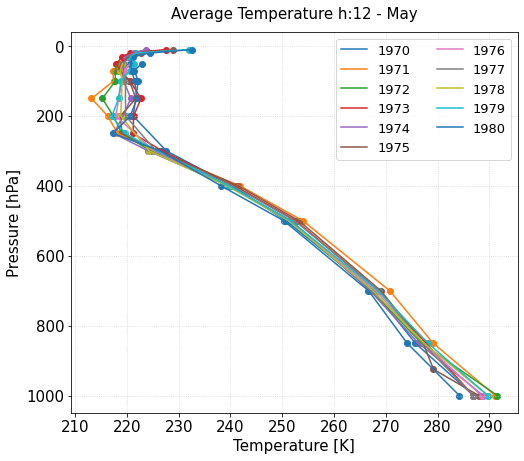

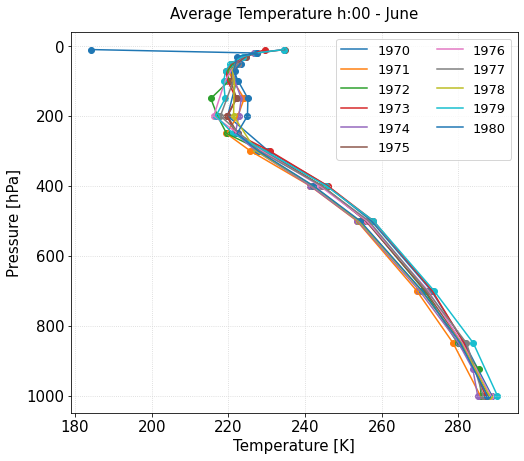

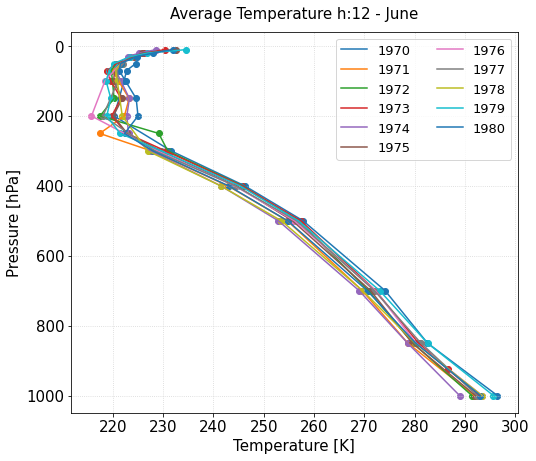

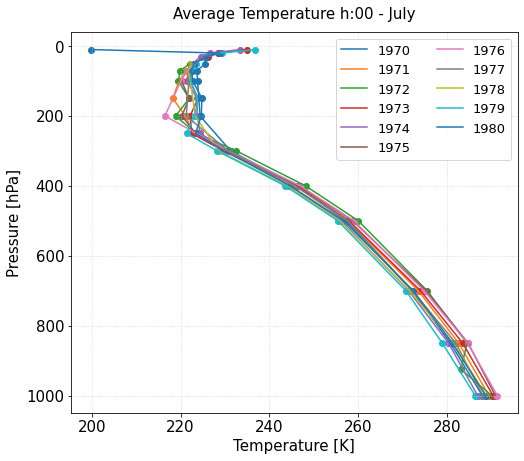

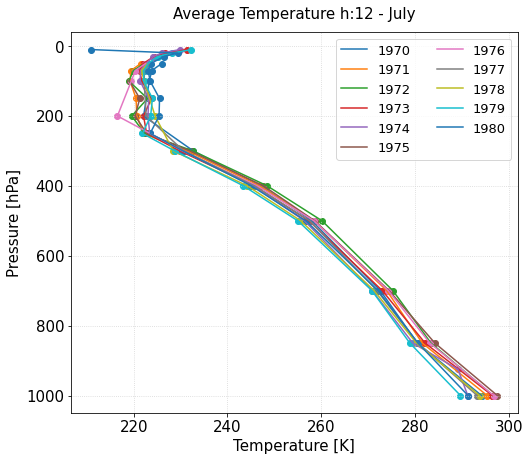

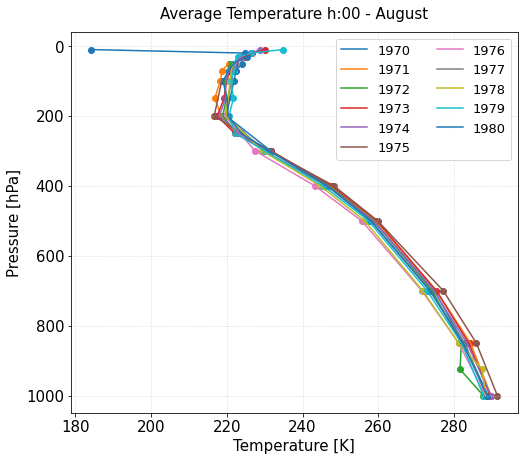

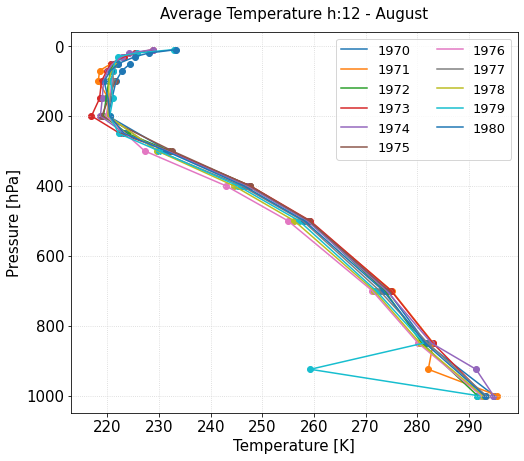

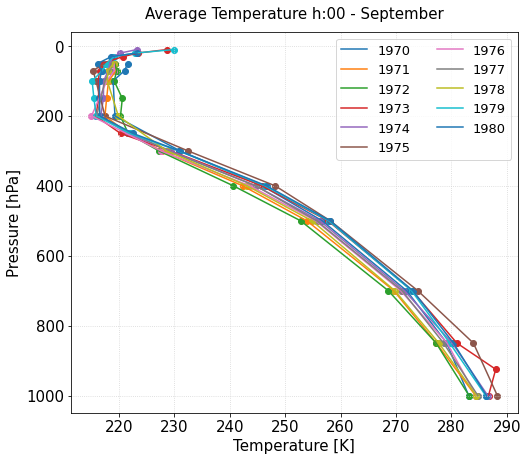

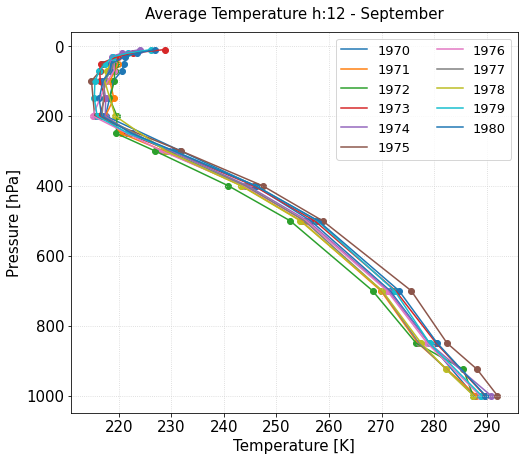

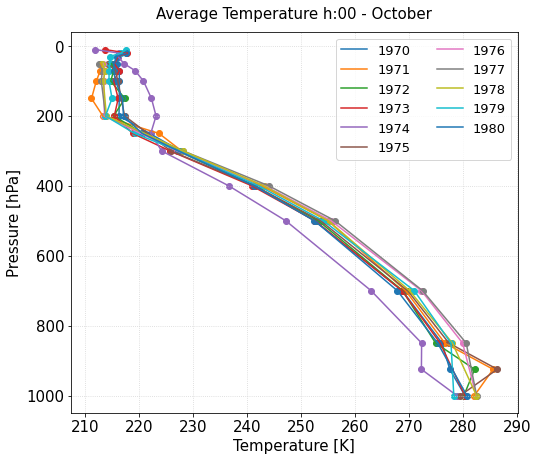

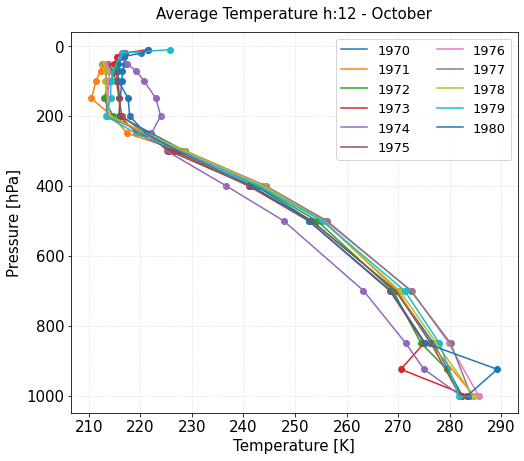

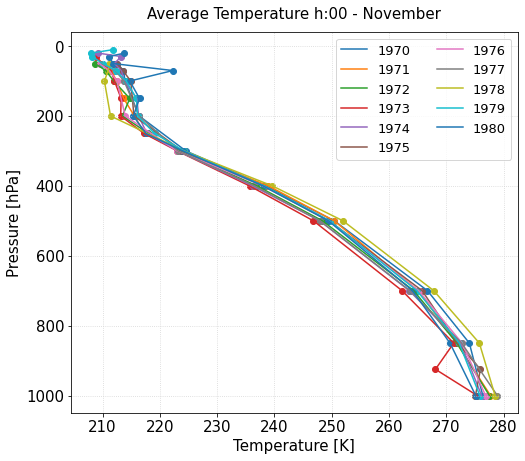

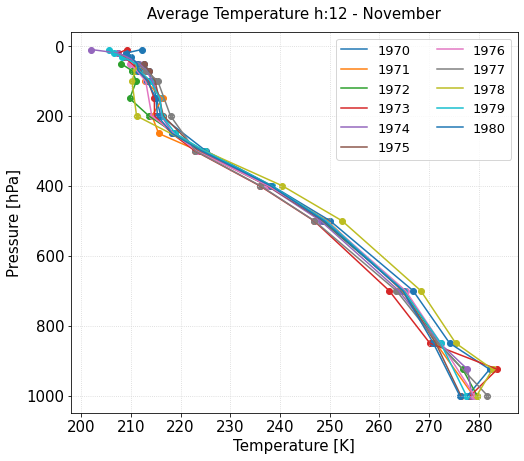

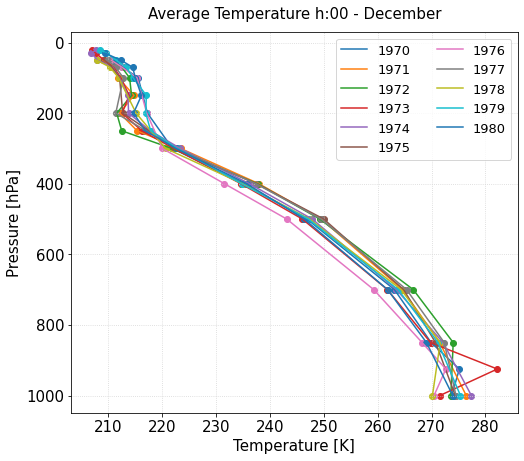

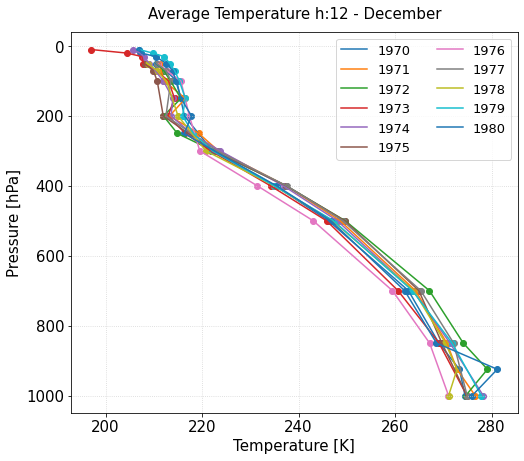

In [58]:
a = profile_per_month_and_year(average_df = average , min_year = 1970, max_year = 1980 , station = station , text='_1970-1980' )


In [ ]:
a = profile_per_month_and_year(average_df = average , min_year = 1980, max_year = 1990 , variables = [85] , station = station , text='_1980-1990' )


In [93]:
out_dir = 'Plots/Monthly_Averages/Monthly_Series'
os.system('mkdir ' + out_dir )

def plot_climate_change(average_df = '' , min_year = 1970, max_year = 2000 , pressure = '' , month = 1 , station = '' , text = '' ):
    
    """ Plot the time series of the averages comprised between min_year and max_year. 
        average_df: dataframe of the observations_table """

    years = range(min_year, max_year)
    
    fs = 15
    obs_00 , obs_12, dt_12, dt_00 = [], [] , [] , []
    obs_bias_12, obs_bias_00 = [], [] # cotainer for the values with bias corrections applied
    
    p = pressure
    m = month
    
    for y in years:

        if m < 10:
            M = '0' + str(m) # correcting the month by adding a 0 
        else:
            M= str(m)
                        
        ts = str(y) + '-' + M + '-01'
        TS = np.datetime64(ts)
                    
        red = average_df.loc [  ( average_df['year'] == y ) &    
                                ( average_df['month'] == m ) & 
                                ( average_df['plev'] == p )   ]
                    
        red_12 = red.loc [ ( red['hour']  == 12 ) ]  
        red_00 = red.loc [ ( red['hour']  == 0 ) ]  

        try:
            value_12 = red_12['ta_glob'][0]
            obs_12.append(value_12)
            obs_bias_12.append(red_12['ta_bias'][0])
            dt_12.append(TS)
        except:
            pass
 
        try:
            value_00 = red_00['ta_glob'][0]
            obs_00.append(value_00)
            obs_bias_00.append(red_00['ta_bias'][0])
            dt_00.append(TS)
        except:
            pass
                    

    def plot(dt_12, value_12 , value_bias_12,hour = '12', text = ''):
        def clean_vec(v1,v2):
            V1,V2 = [],[]
            for i,j in zip(v1,v2):
                if not np.isnan(j):
                    V1.append(i)
                    V2.append(j)
            return V1, V2
        
        
        fig, ax = plt.subplots(figsize=(8,7) )

        #m,b = np.polyfit(x, y, 1)



        if len(  [ v for v in value_12 if not np.isnan(v)] ) >0:
            dt, values = clean_vec(dt_12, value_12)
            #plt.scatter (dt, values , color = 'orange' , label = 'No bias corr.')
            #plt.plot    (dt, values , color = 'red' )
            plt.plot    (dt, values , color = 'blue' , label = 'No bias corr.' , lw = 0.8 )
            plt.scatter (dt, values , color = 'blue' , s = 50, marker='s')

            dt, values = clean_vec(dt_12, value_bias_12)
            plt.scatter (dt, values , color = 'orange' , label = 'Bias corr.', s = 15)

            #plt.scatter (dt, values , color = 'cyan' , label = 'Bias corr.')
            #plt.plot    (dt, values , color = 'blue' ,)


            """ General Properties """
        
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.tick_params(axis='x'   , which='major', labelsize=15 , rotation = 45)

            ax.tick_params(axis='both', which='minor', labelsize=8)
            #w = ax.invert_yaxis() 
        
            ax.set_ylabel( 'Time Stamp'      , fontsize = fs )     
            ax.set_ylabel( 'Temperature [K]' , fontsize = fs )    
            if text == 'zoom':
                ax.set_xlim( np.datetime64('1990-01-01') , np.datetime64('2021-01-01') )     
            else:
                ax.set_xlim( np.datetime64('1900-01-01') , np.datetime64('2021-01-01') )     

            ax.set_ylim( 180 , 320 )     

            ax.grid(ls =":" , color = "lightgray")   
            ax.legend(loc = 'best', fontsize = fs) 
                
            #plt.title("Pressure = " + str(p) + ' [Pa] - Station - ' + station + ' - ' + month_dic[m] , fontsize = fs , y = 1.02 )
            plt.title("h:" + hour + " - Plev= " + str(p) + ' [Pa] - Station: ' + station + ' - ' + month_dic[m] , fontsize = fs , y = 1.02 )

            plt.savefig(out_dir + '/monthly_series_' + station + '_averages_' + month_dic[m] + '_pressure_' + str(p) + '_' + text + '.png' ,   bbox_inches = 'tight' , dpi = 200 )
            plt.show()    

            plt.close()        
        
    #print( dt_12, obs_12 )
    #try:
    #    ff = plot(dt_12, obs_12, dt_00, obs_00 )
    #except:
    #    print(' Data for pressure ' , p , ' month ' , m , '  is not available ')
        
    ff = plot(dt_12, obs_12, obs_bias_12, hour = '12', text = text )
    ff = plot(dt_00, obs_00, obs_bias_00, hour = '00', text = text  )

    # dates = date range 
    

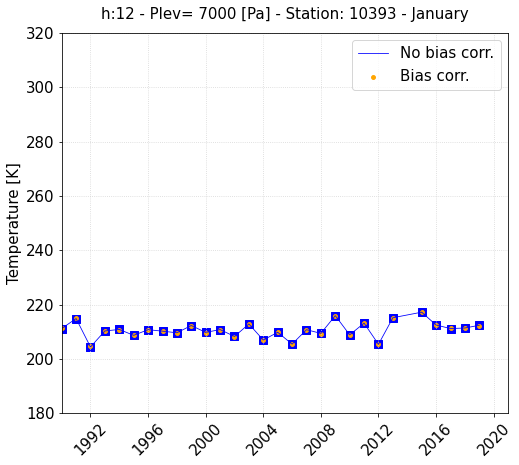

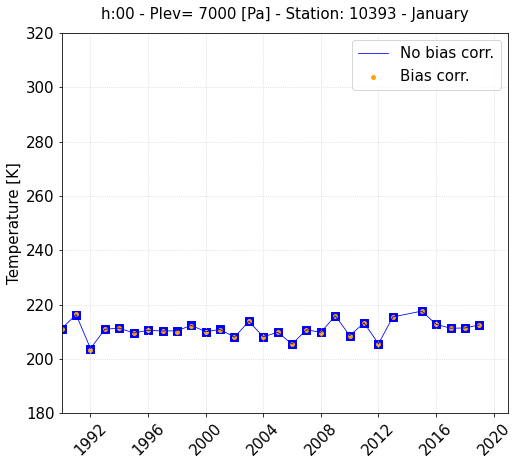

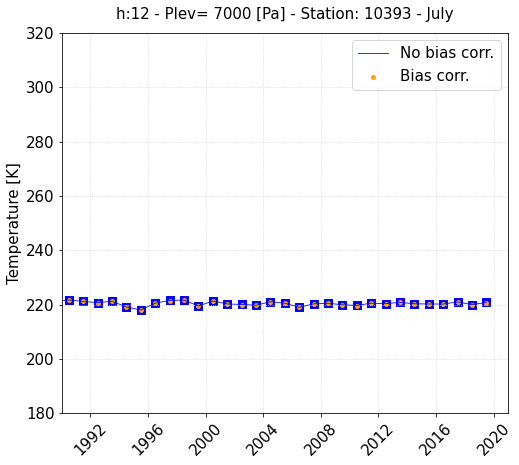

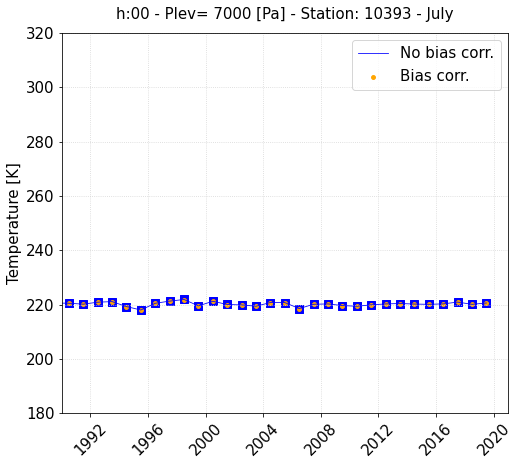

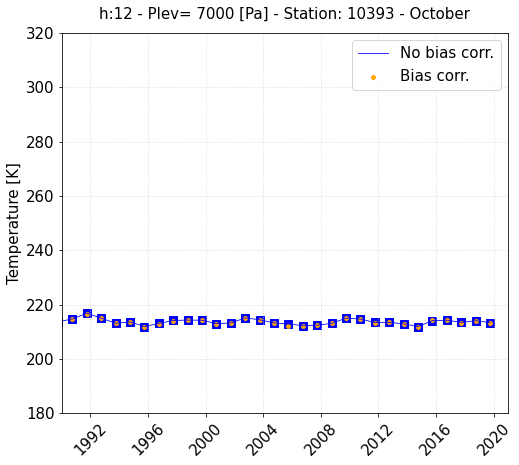

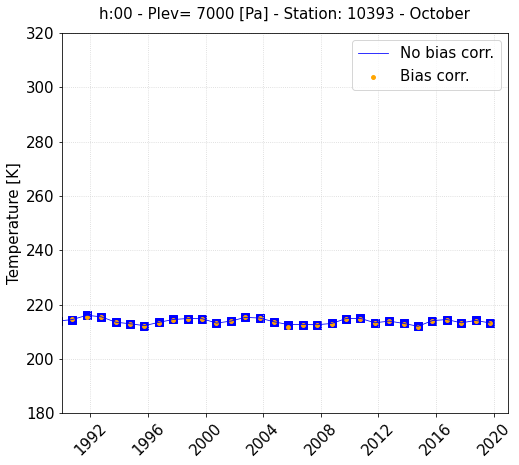

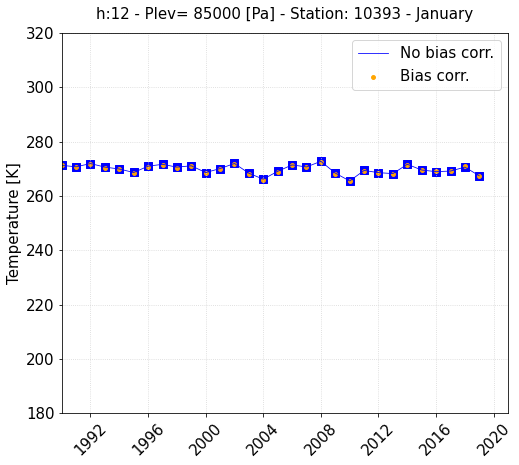

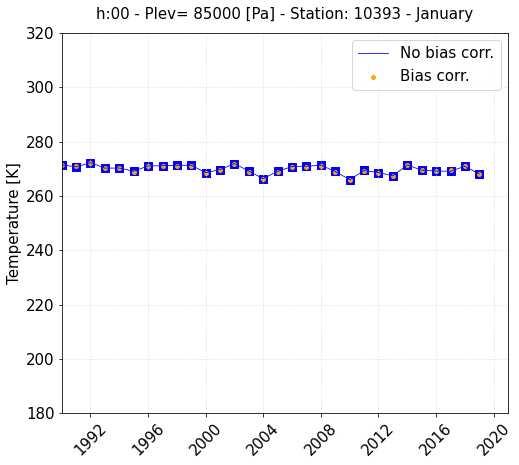

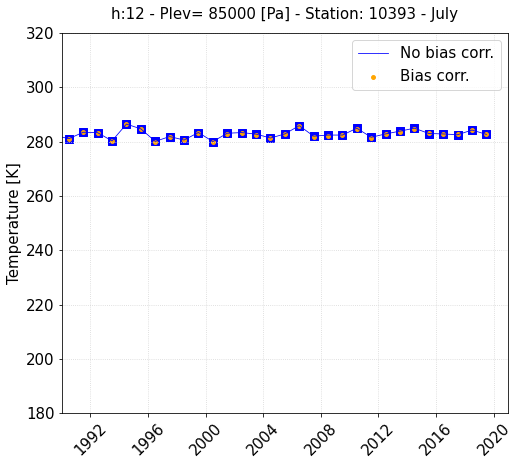

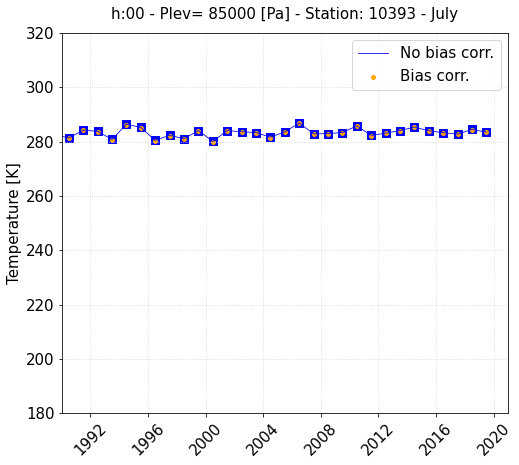

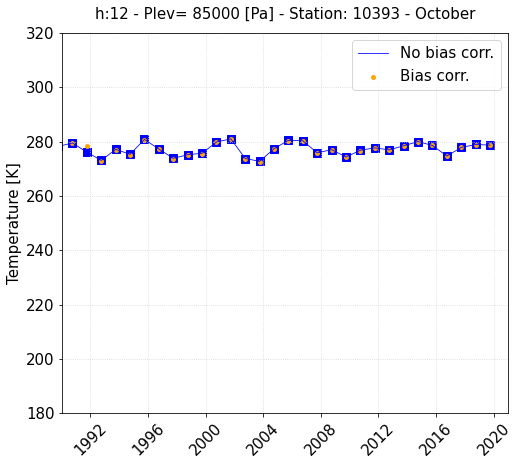

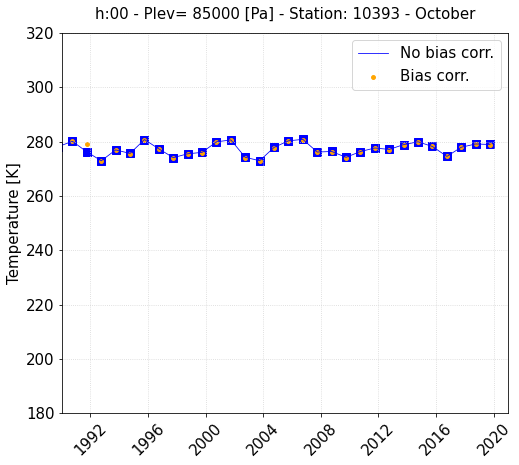

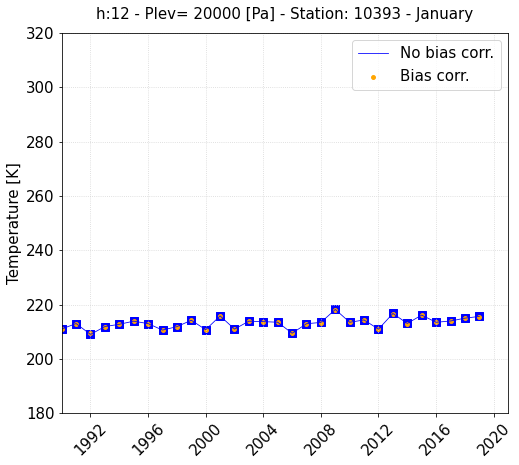

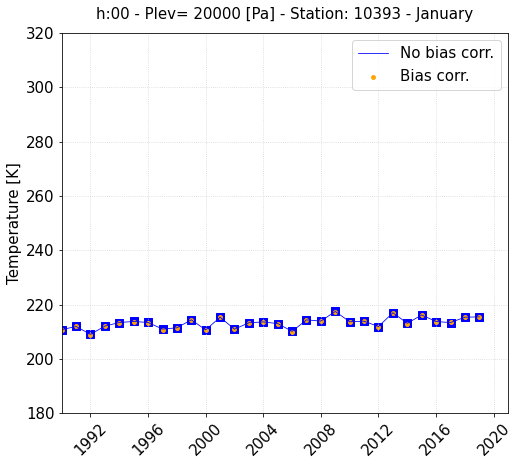

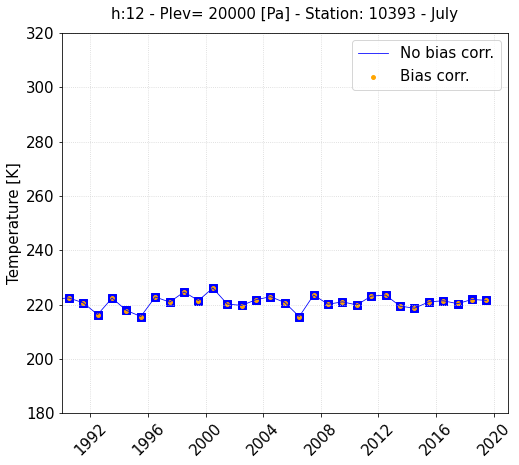

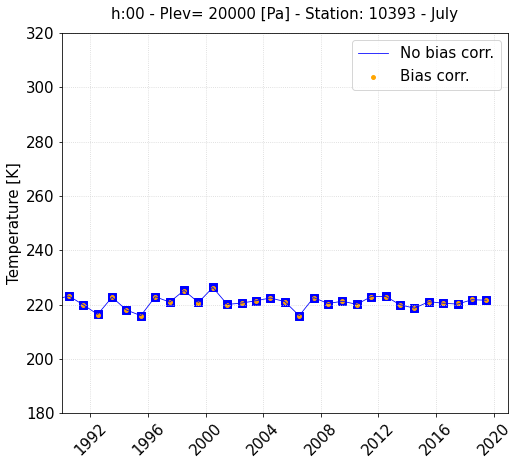

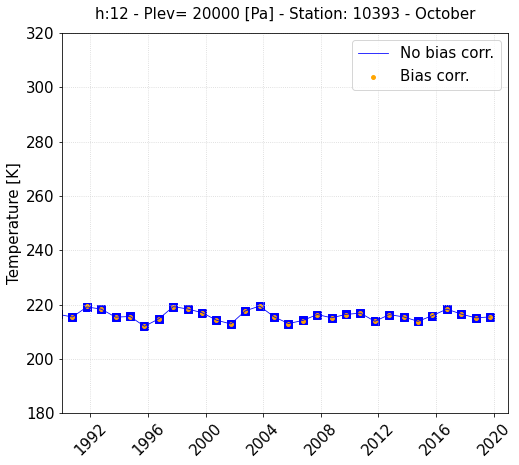

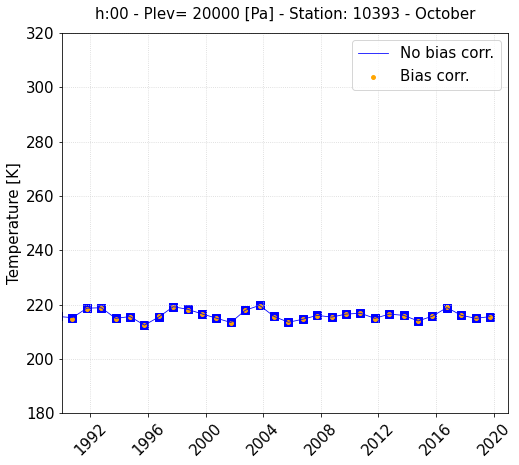

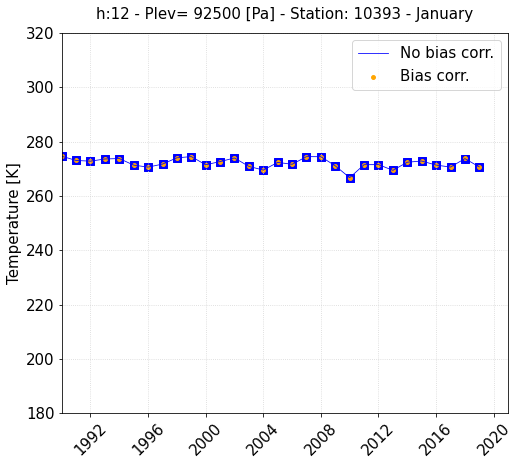

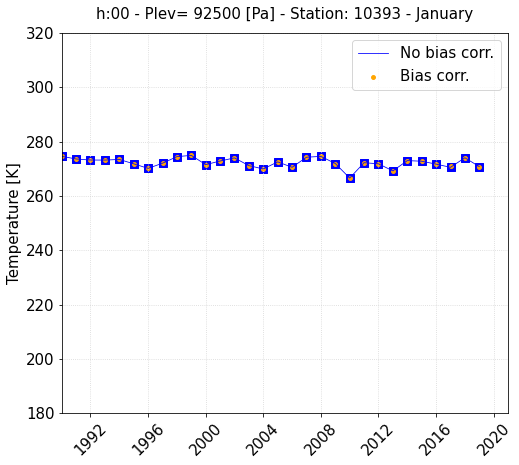

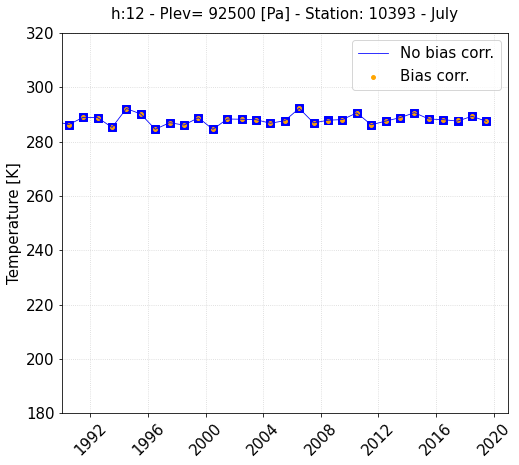

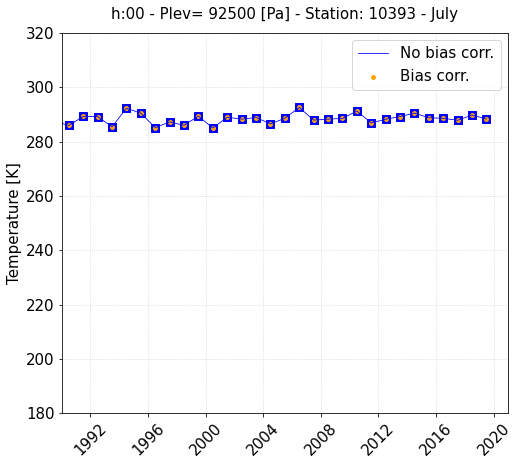

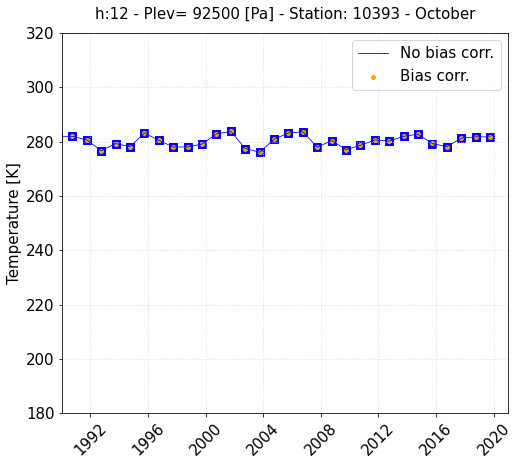

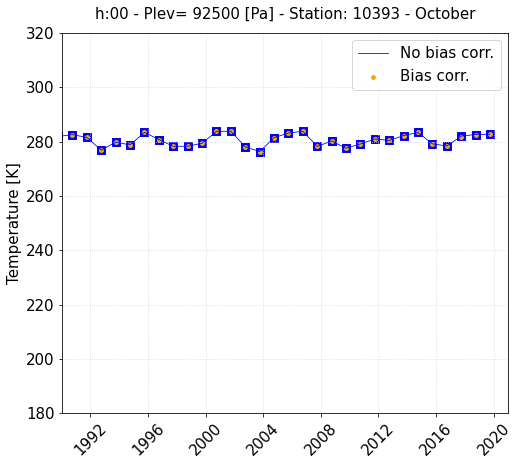

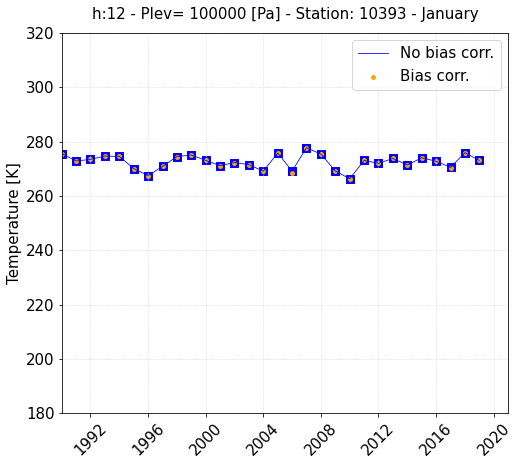

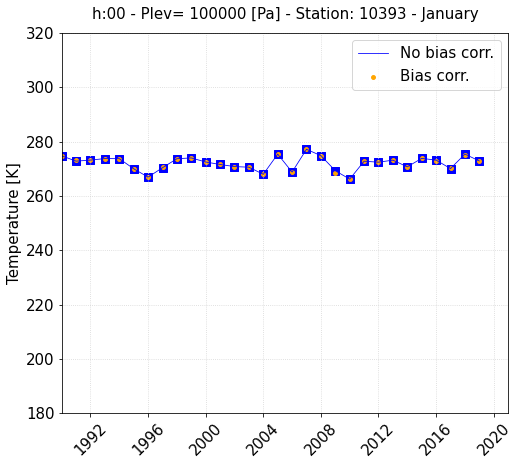

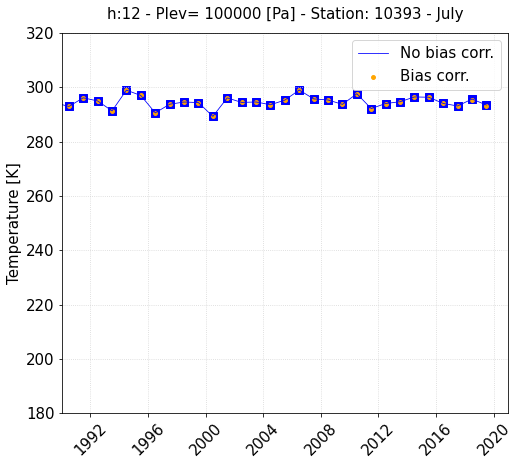

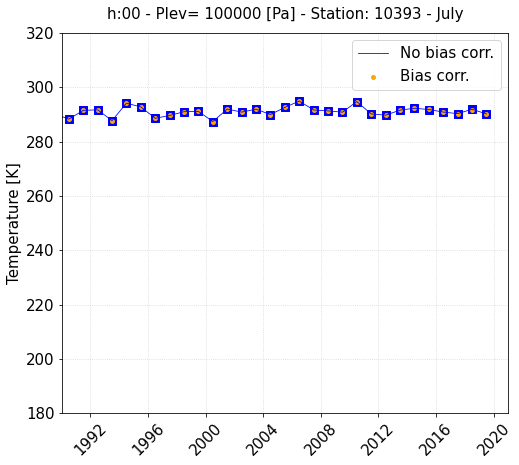

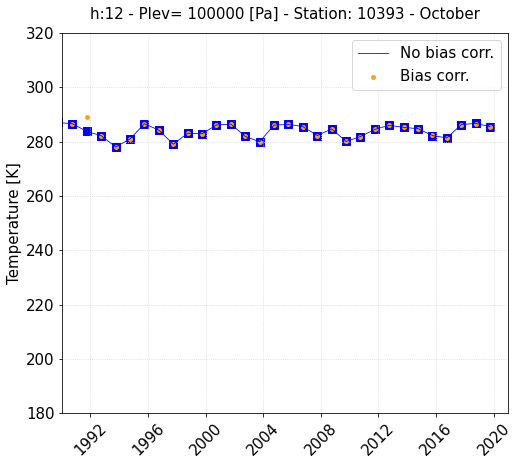

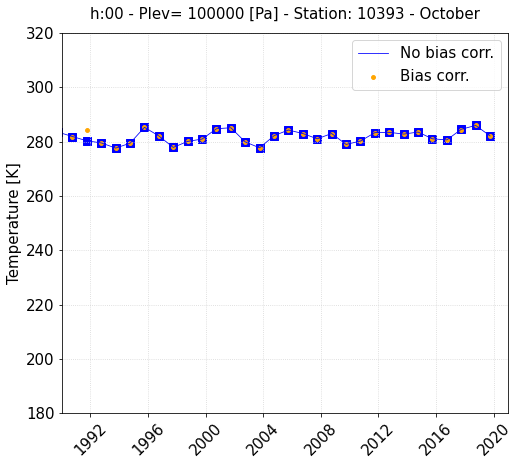

In [94]:
for p in [7000, 85000, 20000, 92500, 100000 ]:
    for m in [1, 7, 10 ]:
        pp = plot_climate_change(average_df = average, min_year = 1900, max_year = 2020 , pressure = p  , month = m,  station = station, text = 'zoom' )